In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [ ]:
# Load the Diabetes dataset from a CSV file (update path accordingly)
diabetes_dataset = pd.read_csv('diabetes.csv')


In [ ]:
# # Sample only 250 samples from the dataset
# diabetes_dataset = diabetes_dataset.sample(n=250, random_state=42)


In [ ]:
# Display basic information about the dataset
print("Dataset Info:")
print(diabetes_dataset.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [ ]:
# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(diabetes_dataset.head())



First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
# Summary statistics
print("\nSummary Statistics:")
print(diabetes_dataset.describe())



Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(diabetes_dataset.isnull().sum())



Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Check for duplicate rows
print("\nDuplicate Rows:")
print(diabetes_dataset.duplicated().sum())



Duplicate Rows:
0


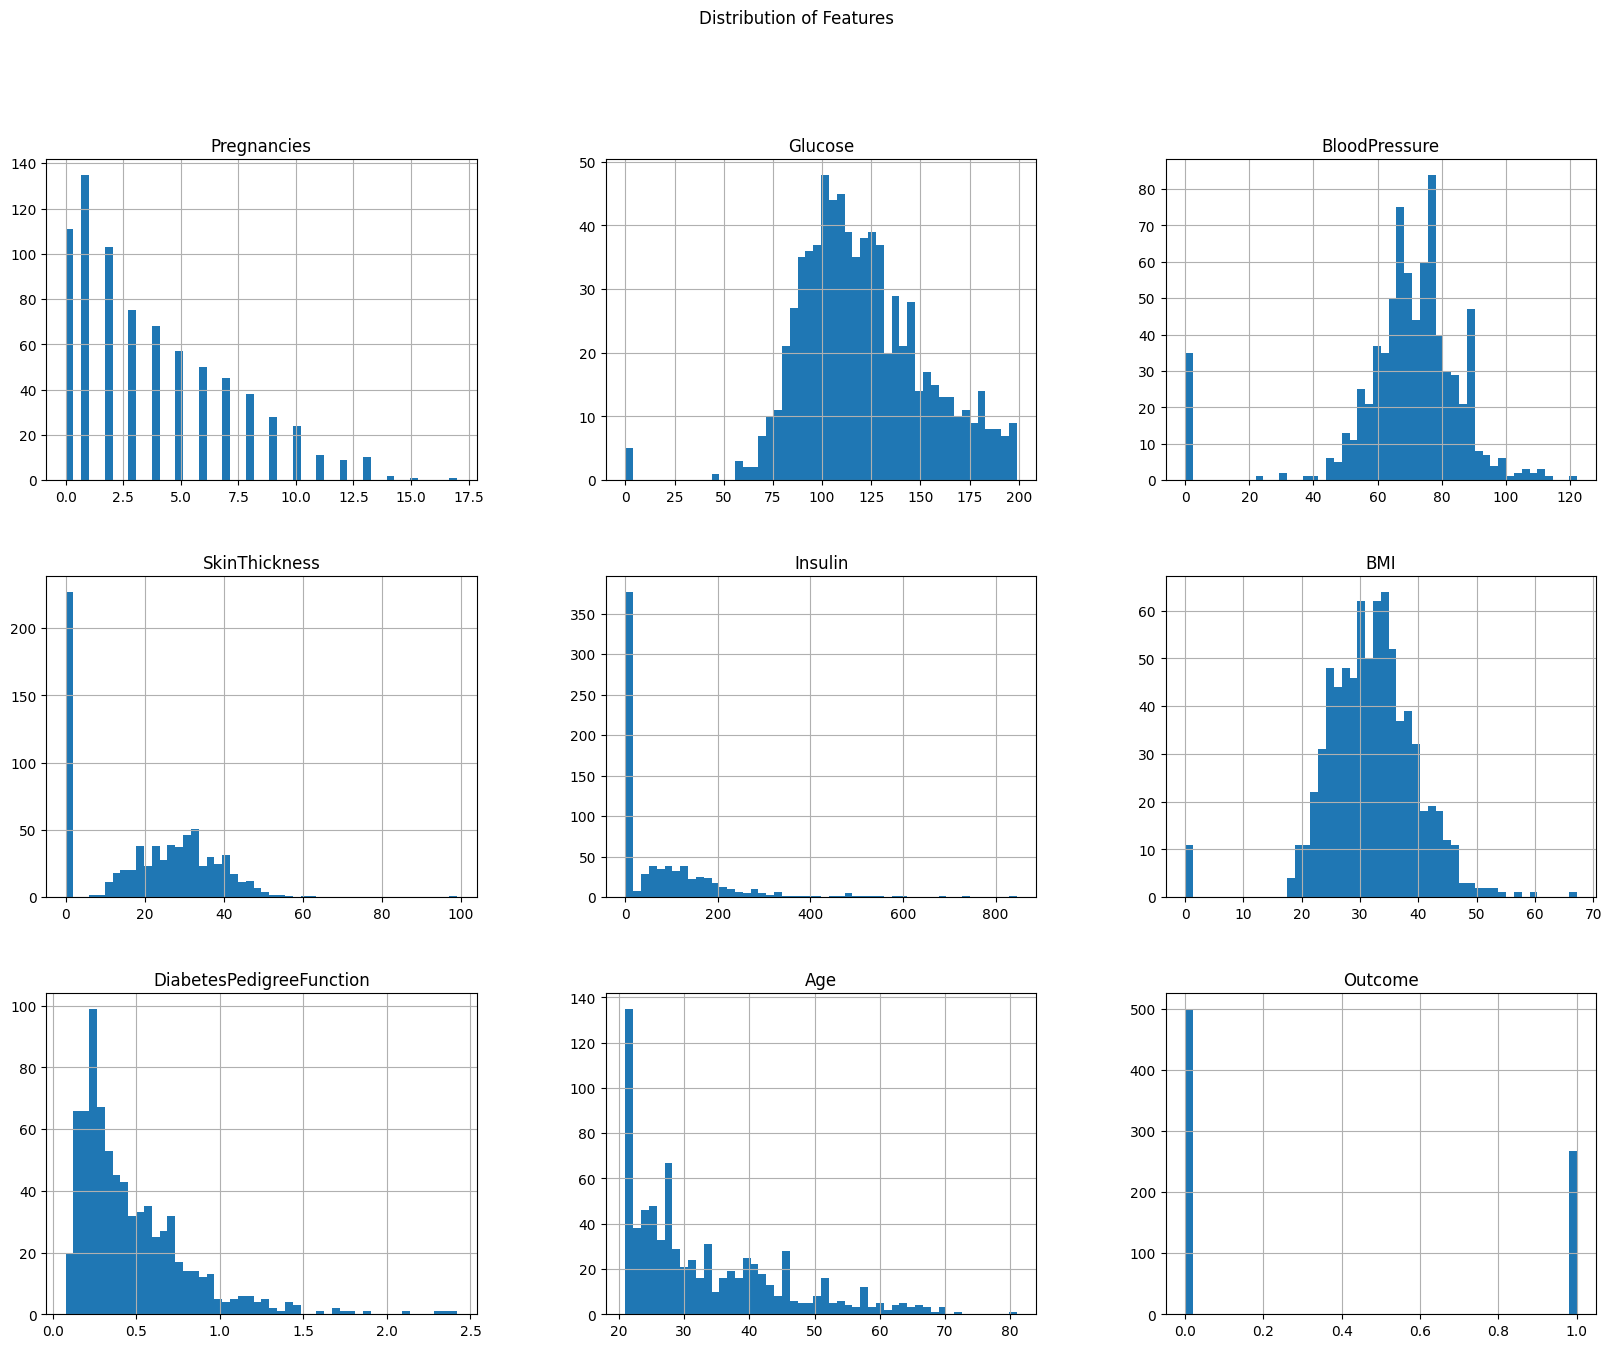

In [ ]:

# Visualize the distribution of each feature
diabetes_dataset.hist(bins=50, figsize=(20, 15))
plt.suptitle('Distribution of Features')
plt.show()



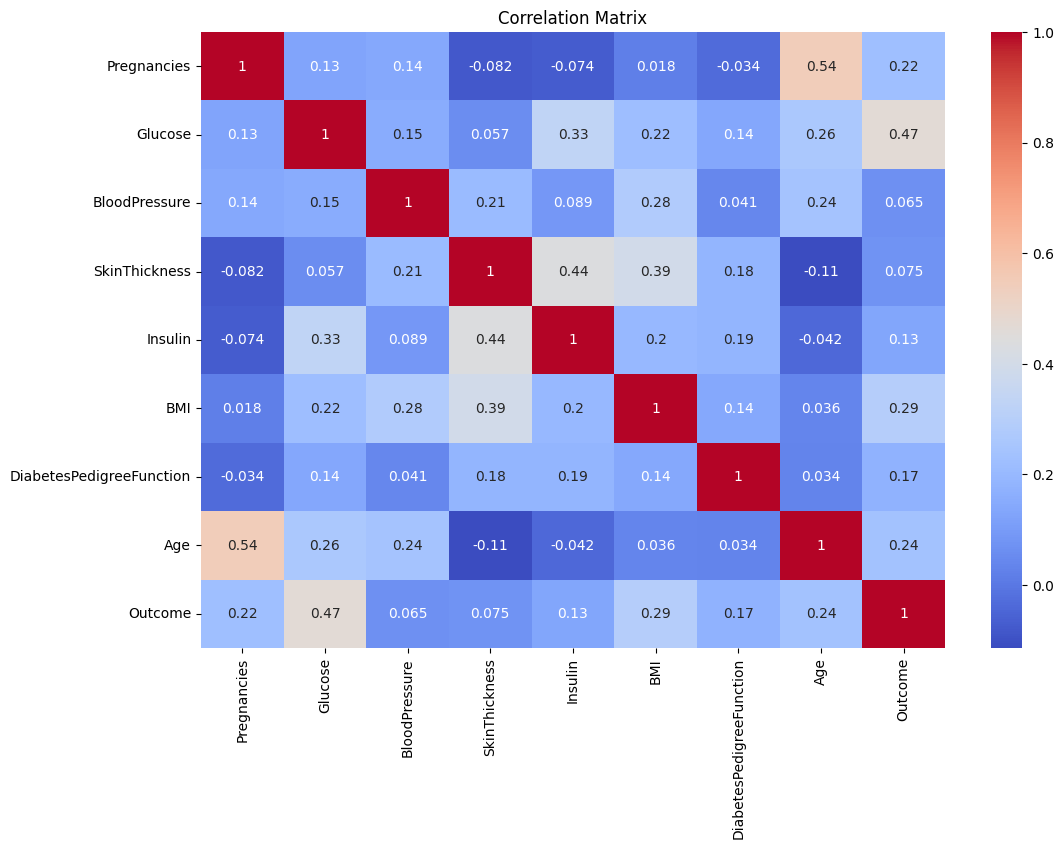

In [ ]:
# Visualize the correlation matrix
corr_matrix = diabetes_dataset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



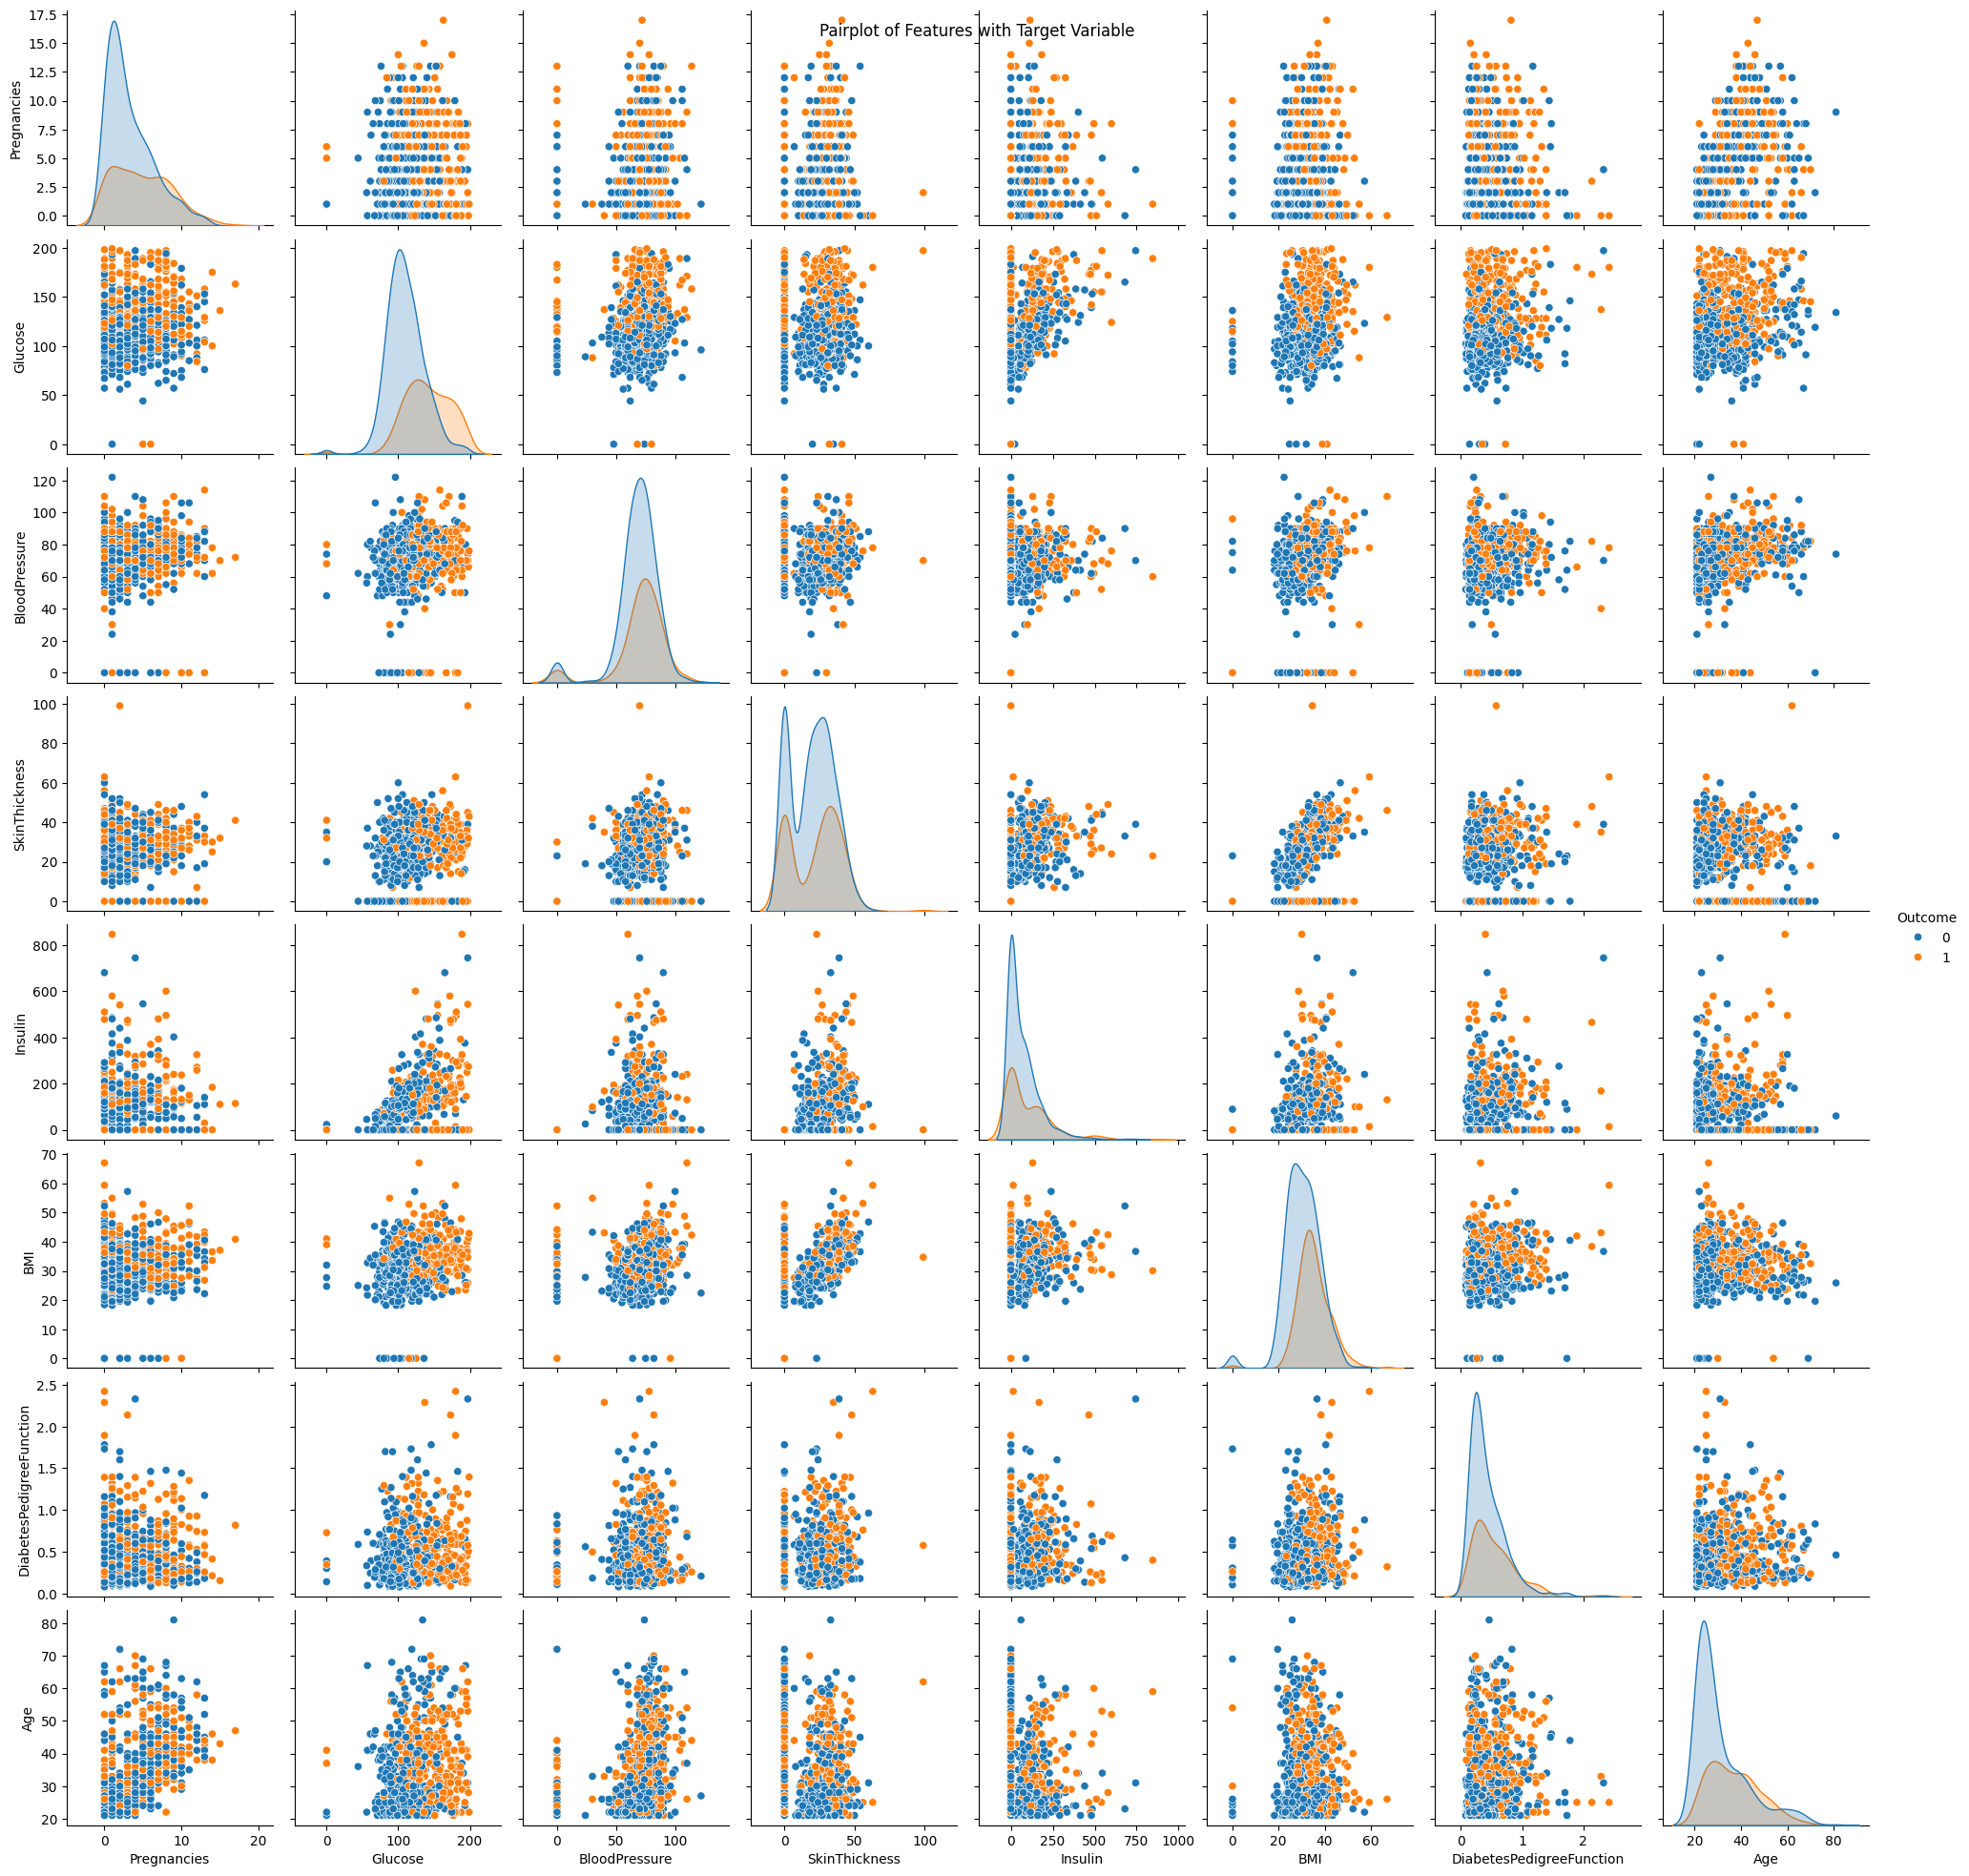

In [ ]:
# Visualize the relationship between features and the target variable
sns.pairplot(diabetes_dataset, hue='Outcome')
plt.suptitle('Pairplot of Features with Target Variable')
plt.show()



In [ ]:
# Separate features and target variable
X = diabetes_dataset.drop(columns=['Outcome'])  # Assuming 'Outcome' is the target variable
y = diabetes_dataset['Outcome']


In [ ]:
# Data Preprocessing: Binarization based on specified thresholds
def binarize_features(X):
    X_binarized = pd.DataFrame(index=X.index)

    # Binarization for each feature
    # 1. Pregnancies (Ordinal scale)
    X_binarized['pregnancies_ge_1'] = X['Pregnancies'] >= 1
    X_binarized['pregnancies_ge_3'] = X['Pregnancies'] >= 3
    X_binarized['pregnancies_ge_6'] = X['Pregnancies'] >= 6

    # 2. Glucose (Inter-ordinal Scale)
    X_binarized['glucose_le_100'] = X['Glucose'] <= 100
    X_binarized['glucose_le_125'] = X['Glucose'] <= 125
    X_binarized['glucose_ge_100'] = X['Glucose'] >= 100
    X_binarized['glucose_ge_125'] = X['Glucose'] >= 125
    X_binarized['glucose_ge_140'] = X['Glucose'] >= 140

    # 3. BloodPressure (Inter-ordinal Scale)
    X_binarized['bp_le_60'] = X['BloodPressure'] <= 60
    X_binarized['bp_le_80'] = X['BloodPressure'] <= 80
    X_binarized['bp_ge_80'] = X['BloodPressure'] >= 80
    X_binarized['bp_ge_90'] = X['BloodPressure'] >= 90
    X_binarized['bp_ge_120'] = X['BloodPressure'] >= 120

    # 4. SkinThickness (Ordinal scale)
    X_binarized['st_ge_20'] = X['SkinThickness'] >= 20
    X_binarized['st_ge_25'] = X['SkinThickness'] >= 25
    X_binarized['st_ge_30'] = X['SkinThickness'] >= 30

    # 5. Insulin (Ordinal scale)
    X_binarized['insulin_ge_100'] = X['Insulin'] >= 100
    X_binarized['insulin_ge_150'] = X['Insulin'] >= 150
    X_binarized['insulin_ge_200'] = X['Insulin'] >= 200

    # 6. BMI (Inter-ordinal Scale)
    X_binarized['bmi_le_18.5'] = X['BMI'] <= 18.5
    X_binarized['bmi_le_25'] = X['BMI'] <= 25
    X_binarized['bmi_ge_25'] = X['BMI'] >= 25
    X_binarized['bmi_ge_30'] = X['BMI'] >= 30
    X_binarized['bmi_ge_35'] = X['BMI'] >= 35

    # 7. DiabetesPedigreeFunction (Ordinal scale)
    X_binarized['dpf_ge_0.5'] = X['DiabetesPedigreeFunction'] >= 0.5
    X_binarized['dpf_ge_1.0'] = X['DiabetesPedigreeFunction'] >= 1.0
    X_binarized['dpf_ge_1.5'] = X['DiabetesPedigreeFunction'] >= 1.5

    # 8. Age (Inter-ordinal Scale)
    X_binarized['age_le_30'] = X['Age'] <= 30
    X_binarized['age_le_45'] = X['Age'] <= 45
    X_binarized['age_ge_30'] = X['Age'] >= 30
    X_binarized['age_ge_45'] = X['Age'] >= 45
    X_binarized['age_ge_60'] = X['Age'] >= 60

    return X_binarized

X_binarized = binarize_features(X)



In [ ]:
# Train-test split on the binarized data with only the sampled dataset
X_train, X_test, y_train, y_test = train_test_split(X_binarized, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
# Lazy FCA Classifier Implementation
class LazyClassifierFCA:
    def __init__(self):
        self.X_train = None
        self.y_train = None

    def fit(self, X_train: pd.DataFrame, y_train: pd.Series) -> None:
        self.X_train = X_train
        self.y_train = y_train

    def classify_sample(self, sample: pd.Series) -> int:
        X_train_positive = self.X_train[self.y_train == 1]
        X_train_negative = self.X_train[self.y_train == 0]

        positive_classifiers = 0
        negative_classifiers = 0

        def is_classifier(intersection, positive=True):
            num_positive = ((X_train_positive | ~intersection) == True).all(axis=1).sum()
            num_negative = ((X_train_negative | ~intersection) == True).all(axis=1).sum()
            if positive:
                return num_negative == 0 and num_positive > 1
            else:
                return num_positive == 0 and num_negative > 1

        for _, pos_sample in X_train_positive.iterrows():
            intersection = sample & pos_sample
            if is_classifier(intersection, positive=True):
                positive_classifiers += 1

        for _, neg_sample in X_train_negative.iterrows():
            intersection = sample & neg_sample
            if is_classifier(intersection, positive=False):
                negative_classifiers += 1

        if positive_classifiers > negative_classifiers:
            return 1
        elif negative_classifiers > positive_classifiers:
            return 0
        else:
            return np.random.choice([0, 1])  # Randomly choose between 0 and 1 in case of a tie

    def predict(self, X_test: pd.DataFrame) -> np.ndarray:
        predictions = []
        for _, sample in X_test.iterrows():
            prediction = self.classify_sample(sample)
            predictions.append(prediction)
        return np.array(predictions)



In [ ]:
# Fit the classifier and make predictions
classifier = LazyClassifierFCA()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)



In [ ]:
# Calculate confusion matrix and performance metrics
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1]) # Ensure labels are specified to get a consistent output format



In [ ]:
# Check if we have a valid confusion matrix before unpacking it
if conf_matrix.shape == (2,2):
    tn, fp, fn, tp = conf_matrix.ravel()
else:
    tn, fp, fn, tp = [0]*4 # Default to zero if any class is missing



In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0) # Handle division by zero if no positive predictions exist.
recall = recall_score(y_test, y_pred, zero_division=0) # Handle division by zero if no true positives exist.
f1 = f1_score(y_test, y_pred, zero_division=0) # Handle division by zero if no positive predictions exist.



In [ ]:
# Print results
print(f'True Positive: {tp}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall (True Positive Rate): {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

True Positive: 40
True Negative: 65
False Positive: 35
False Negative: 14
Accuracy: 0.68
Precision: 0.53
Recall (True Positive Rate): 0.74
F1 Score: 0.62
